**Table of contents**<a id='toc0_'></a>    
- [Analyse Initiale et Identification des Valeurs Manquantes](#toc1_)    
  - [Description des Colonnes du Dataset](#toc1_1_)    
  - [Graphiques de Distribution](#toc1_2_)    
  - [Objectif](#toc1_3_)    
  - [Étapes Réalisées](#toc1_4_)    
  - [Conclusions Tirées](#toc1_5_)    
  - [Justification pour l'Étape Suivante](#toc1_6_)    
- [Nettoyage des Données](#toc2_)    
  - [Objectif](#toc2_1_)    
  - [Étapes Réalisées](#toc2_2_)    
  - [Conclusions Tirées](#toc2_3_)    
  - [Justification pour l'Étape Suivante](#toc2_4_)    
- [Analyse Univariée et Conclusion](#toc3_)    
  - [Observations de la Distribution de la Circonférence des Arbres](#toc3_1_)    
  - [Observations de la Distribution de la Hauteur des Arbres](#toc3_2_)    
  - [Objectif](#toc3_3_)    
  - [Étapes Réalisées](#toc3_4_)    
  - [Conclusions Tirées](#toc3_5_)    
  - [Résumé et Conclusion](#toc3_6_)    
  - [Perspectives pour des Analyses Futures](#toc3_7_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip freeze

asttokens==2.4.1
attrs==23.2.0
beautifulsoup4==4.12.3
bleach==6.1.0
colorama==0.4.6
comm==0.2.2
contourpy==1.2.1
cycler==0.12.1
debugpy==1.8.1
decorator==5.1.1
defusedxml==0.7.1
exceptiongroup==1.2.1
executing==2.0.1
fastjsonschema==2.19.1
fonttools==4.51.0
importlib_metadata==7.1.0
importlib_resources==6.4.0
ipykernel==6.29.4
ipython==8.18.1
jedi==0.19.1
Jinja2==3.1.4
jsonschema==4.22.0
jsonschema-specifications==2023.12.1
jupyter_client==8.6.1
jupyter_core==5.7.2
jupyterlab_pygments==0.3.0
kiwisolver==1.4.5
MarkupSafe==2.1.5
matplotlib==3.8.4
matplotlib-inline==0.1.7
mistune==3.0.2
nbclient==0.10.0
nbconvert==7.16.4
nbformat==5.10.4
nest-asyncio==1.6.0
numpy==1.26.4
packaging==24.0
pandas==2.2.2
pandocfilters==1.5.1
parso==0.8.4
pillow==10.3.0
platformdirs==4.2.1
prompt-toolkit==3.0.43
psutil==5.9.8
pure-eval==0.2.2
Pygments==2.18.0
pyparsing==3.1.2
python-dateutil==2.9.0.post0
pytz==2024.1
pywin32==306
pyzmq==26.0.3
referencing==0.35.1
rpds-py==0.18.1
seaborn==0.13.2
six==1.16.0
sou

# <a id='toc1_'></a>[Analyse Initiale et Identification des Valeurs Manquantes](#toc0_)

In [3]:
# Importation des librairies Pandas, Matplotlib et Seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lecture du fichier de données au format CSV en spécifiant le séparateur ';'
data = pd.read_csv('Paris_tree_dataset.csv', sep=';')
# Affichage des premières lignes pour vérifier la structure des données
data.head()

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


## <a id='toc1_1_'></a>[Description des Colonnes du Dataset](#toc0_)

- **id** : Identifiant unique de l'arbre dans la base de données.
- **type_emplacement** : Type d’emplacement où l’arbre est planté (ex. Arbre, Jardin).
- **domanialite** : Classification du terrain sur lequel l’arbre est situé (ex. Alignement, Jardin).
- **arrondissement** : Zone géographique où l’arbre est localisé.
- **complement_addresse** : Informations complémentaires sur l'adresse.
- **numero** : Numéro associé à l'adresse.
- **lieu** : Adresse de localisation de l'arbre.
- **id_emplacement** : Code identifiant l’emplacement de l’arbre.
- **libelle_francais** : Nom commun de l'arbre en français.
- **genre** : Classification scientifique du genre de l’arbre.
- **espece** : Espèce de l’arbre.
- **varieteoucultivar** : Variété ou cultivar de l’arbre, si applicable.
- **circonference_cm** : Circonférence de l'arbre mesurée en centimètres.
- **hauteur_m** : Hauteur de l’arbre mesurée en mètres.
- **stade_developpement** : Stade de développement de l’arbre (ex. Jeune, Adulte).
- **remarquable** : Indique si l’arbre est classé comme remarquable (1 pour “OUI”, 0 pour “NON”).
- **geo_point_2d** : Coordonnées géographiques de l’arbre (longitude et latitude).

In [4]:
# Obtention des dimensions du data frame
dim = data.shape
print("Nombre de lignes dans le data frame :", dim[0])
print("Nombre de colonnes dans le data frame :", dim[1])

Nombre de lignes dans le data frame : 200137
Nombre de colonnes dans le data frame : 18


In [5]:
# Informations générales sur les colonnes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   complement_addresse  30902 non-null   object 
 5   numero               0 non-null       float64
 6   lieu                 200137 non-null  object 
 7   id_emplacement       200137 non-null  object 
 8   libelle_francais     198640 non-null  object 
 9   genre                200121 non-null  object 
 10  espece               198385 non-null  object 
 11  variete              36777 non-null   object 
 12  circonference_cm     200137 non-null  int64  
 13  hauteur_m            200137 non-null  int64  
 14  stade_developpement  132932 non-null  object 
 15  remarquable      

In [6]:
# Statistiques descriptives des variables numériques
data.describe()

,id,numero,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,2.001370e+05,0.0,200137.000000,200137.000000,137039.000000,200137.000000,200137.000000
mean,3.872027e+05,NaN,83.380479,13.110509,0.001343,48.854491,2.348208
std,5.456032e+05,NaN,673.190213,1971.217387,0.036618,0.030234,0.051220
min,9.987400e+04,NaN,0.000000,0.000000,0.000000,48.742290,2.210241
25%,1.559270e+05,NaN,30.000000,5.000000,0.000000,48.835021,2.307530
50%,2.210780e+05,NaN,70.000000,8.000000,0.000000,48.854162,2.351095
75%,2.741020e+05,NaN,115.000000,12.000000,0.000000,48.876447,2.386838
max,2.024745e+06,NaN,250255.000000,881818.000000,1.000000,48.911485,2.469759


In [7]:
# Calcul du nombre et du pourcentage de valeurs manquantes pour chaque colonne
missing_data = data.isnull().sum()
missing_percentage = (data.isnull().mean() * 100).round(2)  # Arrondi à deux chiffres après la virgule pour la clarté

# Création d'un DataFrame pour une meilleure visualisation
missing_info = pd.DataFrame({'Nombre manquant': missing_data, 'Pourcentage manquant (%)': missing_percentage})
print(missing_info)

                     Nombre manquant  Pourcentage manquant (%)
id                                 0                      0.00
type_emplacement                   0                      0.00
domanialite                        1                      0.00
arrondissement                     0                      0.00
complement_addresse           169235                     84.56
numero                        200137                    100.00
lieu                               0                      0.00
id_emplacement                     0                      0.00
libelle_francais                1497                      0.75
genre                             16                      0.01
espece                          1752                      0.88
variete                       163360                     81.62
circonference_cm                   0                      0.00
hauteur_m                          0                      0.00
stade_developpement            67205                   

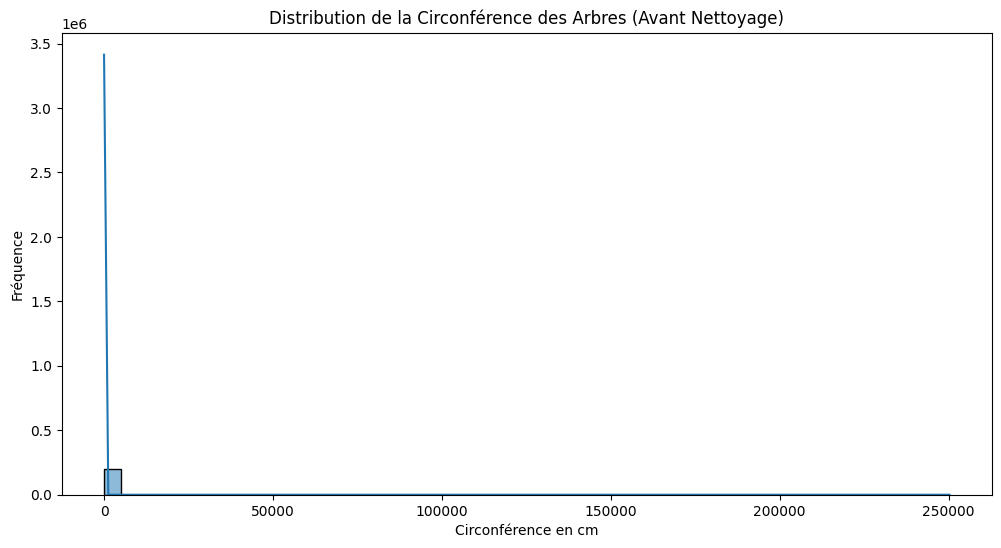

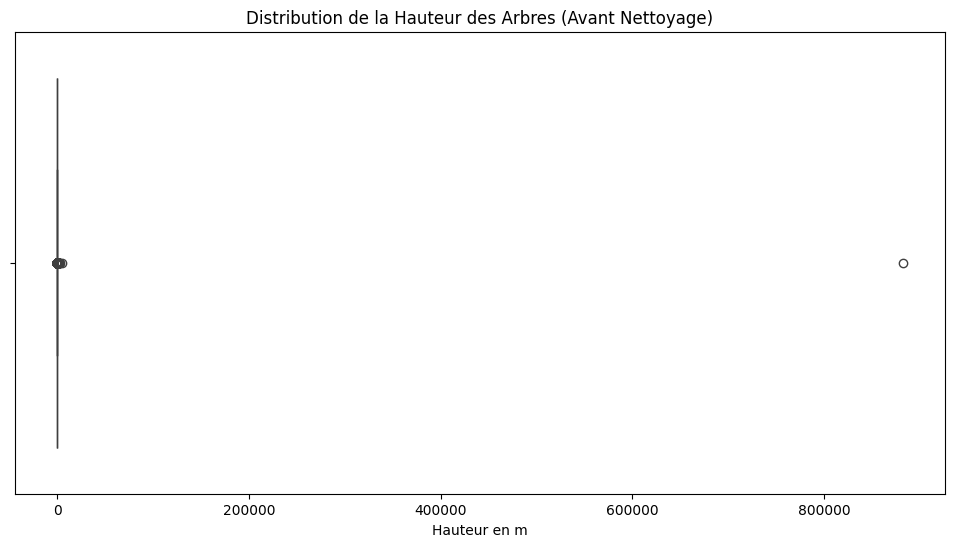

In [8]:
# Transformation des séries en DataFrame
data_circonference = pd.DataFrame(data['circonference_cm'])
data_hauteur = pd.DataFrame(data['hauteur_m'])

# Affichage de la distribution de la circonférence avant nettoyage
plt.figure(figsize=(12, 6))
sns.histplot(data=data_circonference, x='circonference_cm', bins=50, kde=True)
plt.title('Distribution de la Circonférence des Arbres (Avant Nettoyage)')
plt.xlabel('Circonférence en cm')
plt.ylabel('Fréquence')
plt.show()

# Affichage de la distribution de la hauteur après nettoyage avec un boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_hauteur, x='hauteur_m')
plt.title('Distribution de la Hauteur des Arbres (Avant Nettoyage)')
plt.xlabel('Hauteur en m')
plt.show()

## <a id='toc1_2_'></a>[Graphiques de Distribution](#toc0_)

Pour mieux comprendre la distribution des données initiales, nous avons inclus des graphiques de la distribution de la circonférence et de la hauteur des arbres avant le nettoyage. Ces graphiques montrent clairement que les données brutes contiennent des valeurs aberrantes importantes, rendant les distributions difficilement exploitables.

1. **Distribution de la Circonférence des Arbres (Avant Nettoyage)** : Cet histogramme montre une forte concentration des valeurs à de faibles circonférences, avec quelques valeurs aberrantes très élevées qui étendent la distribution sur une large gamme. Cette concentration extrême et ces valeurs aberrantes rendent difficile l'interprétation des données brutes.

2. **Distribution de la Hauteur des Arbres (Avant Nettoyage)** : Le boxplot ci-dessous révèle une dispersion extrêmement large des hauteurs, avec des valeurs aberrantes extrêmes. La majorité des valeurs se concentrent dans une plage étroite, mais quelques valeurs extrêmement élevées créent une dispersion importante, rendant les données initiales difficiles à analyser.

Ces graphiques illustrent la nécessité de nettoyer les données pour éliminer les valeurs aberrantes et obtenir des distributions plus exploitables. Nous examinerons les effets du nettoyage des données plus en détail dans la section "Analyse Univariée et Conclusion".

## <a id='toc1_3_'></a>[Objectif](#toc0_)
L'objectif de cette première étape est de comprendre la structure et les caractéristiques de notre jeu de données en effectuant une analyse exploratoire. Nous commençons par importer les données et vérifier leur intégrité. Ensuite, nous identifions les valeurs manquantes et analysons les distributions statistiques des variables.

## <a id='toc1_4_'></a>[Étapes Réalisées](#toc0_)

1. Importation et Vérification des Données:
    - Nous avons importé les données du fichier CSV et affiché les premières lignes pour vérifier la structure et la cohérence des données.
2. Description des Colonnes:
    - Nous avons détaillé chaque colonne pour comprendre la signification de chaque variable présente dans le dataset.
3. Analyse des Dimensions:
    - Nous avons obtenu les dimensions du DataFrame, constatant qu’il contient 200,137 lignes et 18 colonnes.
4. Informations Générales:
    - Nous avons utilisé `data.info()` pour afficher des informations générales sur les colonnes, y compris les types de données et le nombre de valeurs non nulles.
5. Statistiques Descriptives:
    - Avec `data.describe()`, nous avons calculé des statistiques descriptives pour les variables numériques, telles que la moyenne, la médiane, l’écart-type, les valeurs minimales et maximales.
6. Identification des Valeurs Manquantes:
    - Nous avons calculé le nombre et le pourcentage de valeurs manquantes pour chaque colonne, créant un DataFrame `missing_info` pour une visualisation claire.


## <a id='toc1_5_'></a>[Conclusions Tirées](#toc0_)

- **Colonnes avec des Valeurs Manquantes Élevées** :
    - Nous avons identifié plusieurs colonnes avec un pourcentage élevé de valeurs manquantes, notamment `numero` (100%), `complement_addresse` (84.56%), et `variete` (81.62%). Ces colonnes ont été considérées pour suppression dans les étapes de nettoyage.
- **Colonnes à Faible Pourcentage de Valeurs Manquantes** :
    - Certaines colonnes, comme `espece` (0.88%) et `libelle_francais` (0.75%), ont un faible pourcentage de valeurs manquantes. Nous décidons de les conserver dans le dataset sans imputation pour ne pas altérer les analyses futures.
- **Colonnes Importantes avec des Valeurs Manquantes** :
    - `stade_developpement` et `remarquable` ont respectivement 33.58% et 31.53% de valeurs manquantes. Étant donné leur importance potentielle pour les analyses futures, nous avons décidé d’imputer ces valeurs.

## <a id='toc1_6_'></a>[Justification pour l'Étape Suivante](#toc0_)

Les observations et les conclusions tirées de cette analyse initiale nous ont permis d'identifier les colonnes problématiques et de justifier nos décisions de nettoyage. Les prochaines étapes se concentreront sur le nettoyage des données pour s'assurer que notre jeu de données est prêt pour des analyses plus détaillées et précises.

En effectuant une analyse initiale rigoureuse, nous posons les bases pour un travail de qualité qui repose sur des données fiables et bien comprises.

# <a id='toc2_'></a>[Nettoyage des Données](#toc0_)

In [9]:
# Définir des seuils pour identifier les valeurs aberrantes basées sur les records du monde
circonference_seuil = 3110  # 31.1 mètres convertis en cm
hauteur_seuil = 83.8        # En mètres

# Identification des valeurs aberrantes selon les nouveaux seuils
valeurs_aberrantes_circonference = data[data['circonference_cm'] > circonference_seuil]
valeurs_aberrantes_hauteur = data[data['hauteur_m'] > hauteur_seuil]

# Méthode Interquartile pour identifier les outliers
Q1_circonference = data['circonference_cm'].quantile(0.25)
Q3_circonference = data['circonference_cm'].quantile(0.75)
IQR_circonference = Q3_circonference - Q1_circonference
borne_inf_circonference = Q1_circonference - 1.5 * IQR_circonference
borne_sup_circonference = Q3_circonference + 1.5 * IQR_circonference
outliers_circonference = data[(data['circonference_cm'] < borne_inf_circonference) | (data['circonference_cm'] > borne_sup_circonference)]

Q1_hauteur = data['hauteur_m'].quantile(0.25)
Q3_hauteur = data['hauteur_m'].quantile(0.75)
IQR_hauteur = Q3_hauteur - Q1_hauteur
borne_inf_hauteur = Q1_hauteur - 1.5 * IQR_hauteur
borne_sup_hauteur = Q3_hauteur + 1.5 * IQR_hauteur
outliers_hauteur = data[(data['hauteur_m'] < borne_inf_hauteur) | (data['hauteur_m'] > borne_sup_hauteur)]

# Fusion des outliers identifiés par les deux méthodes
outliers_combined = pd.concat([valeurs_aberrantes_circonference, outliers_circonference]).drop_duplicates()
outliers_combined = pd.concat([outliers_combined, valeurs_aberrantes_hauteur, outliers_hauteur]).drop_duplicates()

# Suppression des outliers combinés
data_cleaned = data[~data.index.isin(outliers_combined.index)]

# Suppression des valeurs de circonférence et de hauteur égales à zéro
data_cleaned = data_cleaned[(data_cleaned['circonference_cm'] > 0) & (data_cleaned['hauteur_m'] > 0)]

# Gestion des valeurs manquantes
colonnes_a_supprimer = ['numero', 'complement_addresse', 'variete']
data_cleaned = data_cleaned.drop(columns=colonnes_a_supprimer)
data_cleaned['remarquable'] = data_cleaned['remarquable'].fillna(0)

# Imputation des valeurs manquantes pour 'stade_developpement' par la valeur la plus fréquente (mode)
mode_stade = data_cleaned['stade_developpement'].mode()[0]
data_cleaned['stade_developpement'] = data_cleaned['stade_developpement'].fillna(mode_stade)

# Vérification des modifications
print("Dimensions des données après gestion des valeurs manquantes :", data_cleaned.shape)

Dimensions des données après gestion des valeurs manquantes : (154626, 15)


## <a id='toc2_1_'></a>[Objectif](#toc0_)
L'objectif de cette étape est de préparer notre jeu de données pour une analyse précise et fiable en éliminant les valeurs aberrantes et en gérant les valeurs manquantes.

## <a id='toc2_2_'></a>[Étapes Réalisées](#toc0_)

1. **Identification des Valeurs Aberrantes**:
    - **Approche métier** : Nous avons défini des seuils basés sur les records mondiaux pour la circonférence et la hauteur des arbres, en utilisant les caractéristiques du séquoia "Général Sherman" comme référence.
    - **Méthode Interquartile (IQR)** : Nous avons utilisé cette méthode statistique pour identifier les valeurs aberrantes basées sur les quartiles de la distribution. L'IQR (Interquartile Range) est la différence entre le troisième quartile (Q3) et le premier quartile (Q1). Les outliers sont définis comme les points situés en dehors de 1.5 fois l'IQR au-dessus de Q3 ou en dessous de Q1.

2. **Suppression des Valeurs Aberrantes**:
    - Nous avons combiné les outliers identifiés par les deux méthodes et les avons supprimés du jeu de données.

3. **Suppression des Valeurs Égales à Zéro**:
    - Nous avons également supprimé les valeurs de circonférence et de hauteur égales à zéro, car elles ne sont pas réalistes pour des arbres.

4. **Gestion des Valeurs Manquantes**:
   - **Suppression des Colonnes** : Nous avons supprimé les colonnes avec un pourcentage très élevé de valeurs manquantes (`numero`, `complement_addresse`, `variete`). Ces colonnes contenaient trop peu de données pour être utiles et leur imputation aurait pu introduire des biais importants dans notre analyse.
   - **Imputation des Valeurs Manquantes** : 
       - `remarquable` : Les valeurs manquantes ont été remplacées par 0. Cela signifie que les arbres non marqués comme remarquables par défaut sont considérés comme non remarquables, ce qui est une hypothèse raisonnable compte tenu de la nature des données.
       - `stade_developpement` : Les valeurs manquantes ont été imputées par la valeur la plus fréquente (mode), ce qui permet de conserver la cohérence statistique du dataset. Le mode représente la valeur la plus courante dans la colonne, assurant ainsi que l'imputation reflète une situation couramment observée dans les données.

Ces étapes nous ont permis de gérer efficacement les valeurs manquantes, assurant ainsi que notre jeu de données est complet et prêt pour des analyses ultérieures sans introduire de biais significatifs.

## <a id='toc2_3_'></a>[Conclusions Tirées](#toc0_)

- **Réduction des Valeurs Aberrantes** :
    - En supprimant les valeurs aberrantes, nous avons amélioré la qualité de notre jeu de données, ce qui permettra d'obtenir des analyses plus précises.

- **Nettoyage des Zéros** :
    - La suppression des valeurs de circonférence et de hauteur égales à zéro a permis d'éliminer des anomalies évidentes.

- **Gestion Efficace des Valeurs Manquantes** :
    - En supprimant les colonnes avec un pourcentage élevé de valeurs manquantes et en imputant les valeurs manquantes pour des colonnes importantes, nous avons assuré que notre jeu de données est complet et utilisable pour des analyses ultérieures.

## <a id='toc2_4_'></a>[Justification pour l'Étape Suivante](#toc0_)

Grâce à ce nettoyage rigoureux, nous avons maintenant un jeu de données fiable et prêt pour des analyses plus détaillées. Cette préparation nous permet de passer à l'analyse univariée des variables, en sachant que les données sont exemptes de valeurs aberrantes et que les valeurs manquantes ont été gérées de manière appropriée.

En nettoyant les données de manière exhaustive, nous nous assurons que les conclusions tirées des analyses futures seront précises et pertinentes.

# <a id='toc3_'></a>[Analyse Univariée et Conclusion](#toc0_)

Médiane de circonference_cm: 80.0
Médiane de hauteur_m: 10.0
Écart-type de circonference_cm: 50.36696114075837
Écart-type de hauteur_m: 4.575605263329693


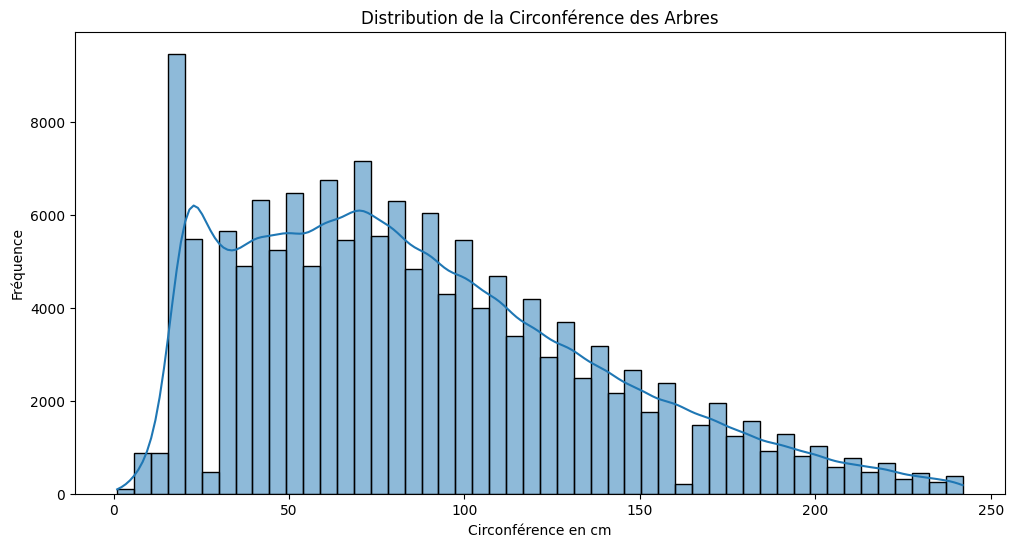

In [10]:
# Calcul de la médiane pour les variables pertinentes
variables_pertinentes = ['circonference_cm', 'hauteur_m']
for col in variables_pertinentes:
    median_value = data_cleaned[col].median()
    print(f"Médiane de {col}: {median_value}")

# Calcul de l'écart-type pour les variables pertinentes
for col in variables_pertinentes:
    std_dev = data_cleaned[col].std()
    print(f"Écart-type de {col}: {std_dev}")

# Créer l'histogramme après suppression des doublons
plt.figure(figsize=(12, 6))
sns.histplot(data=data_cleaned, x='circonference_cm', bins=50, kde=True)
plt.title('Distribution de la Circonférence des Arbres')
plt.xlabel('Circonférence en cm')
plt.ylabel('Fréquence')
plt.show()

## <a id='toc3_1_'></a>[Observations de la Distribution de la Circonférence des Arbres](#toc0_)

Avec les données nettoyées, nous pouvons maintenant tirer des conclusions intéressantes et exploitables de cette distribution. La suppression des valeurs aberrantes extrêmes a permis de clarifier la distribution et de rendre les tendances plus visibles.

- **Distribution Asymétrique** : La distribution de la circonférence des arbres est asymétrique, avec un décalage vers la droite. La majorité des arbres ont des circonférences plus petites.

- **Pic Principal** : Le pic le plus élevé se situe autour de 20 cm de circonférence, indiquant que c'est la taille la plus fréquente parmi les arbres de l'échantillon.

- **Concentration Secondaire** : Il y a une concentration notable de fréquences d'arbres dans l'intervalle de 50 à 120 cm de circonférence. Cela représente un groupe significatif d'arbres de taille intermédiaire.

- **Diminution Progressive** : À partir de 120 cm de circonférence, on observe une diminution progressive et régulière du nombre d'arbres, indiquant que les grands arbres sont de plus en plus rares.

- **Ligne KDE (Kernel Density Estimation)** : La ligne de densité lissée confirme la tendance générale, montrant une forte concentration de petits arbres et une longue queue décroissante vers les plus grandes circonférences. La KDE (Kernel Density Estimation) est une méthode non paramétrique pour estimer la densité de probabilité d'une variable, permettant de lisser les données pour mieux visualiser la distribution sous-jacente.

Ces observations sont cruciales pour comprendre la répartition des tailles d'arbres dans notre projet de smart city et peuvent aider à optimiser les tournées des agents d'entretien des espaces verts en ciblant les zones avec des arbres de tailles spécifiques.

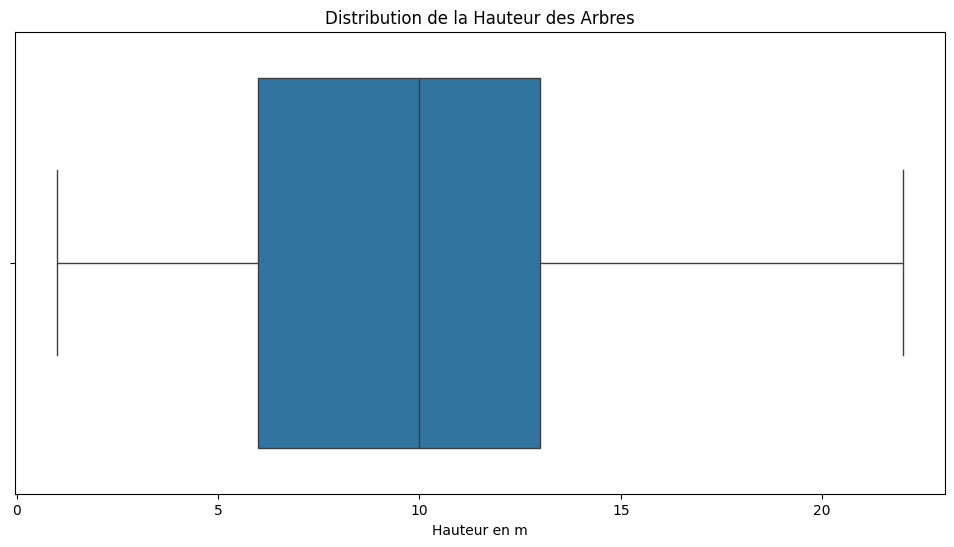

In [11]:
# Visualisation de la distribution de la hauteur
plt.figure(figsize=(12, 6))
sns.boxplot(x=data_cleaned['hauteur_m'])
plt.title('Distribution de la Hauteur des Arbres')
plt.xlabel('Hauteur en m')
plt.show()

## <a id='toc3_2_'></a>[Observations de la Distribution de la Hauteur des Arbres](#toc0_)

Grâce au nettoyage des données, nous avons éliminé les valeurs aberrantes extrêmes qui rendaient les graphiques initiaux difficilement exploitables. Maintenant, la distribution des hauteurs des arbres est plus claire et plus informative. La majorité des arbres ont des hauteurs qui se situent dans une plage réaliste et cohérente, permettant une analyse plus précise de cette variable.

- **Médiane** : La médiane de la hauteur des arbres se situe autour de 10 mètres. Cela signifie que 50% des arbres ont une hauteur inférieure à 10 mètres et 50% ont une hauteur supérieure.

- **Intervalle Interquartile (IQR)** : L'intervalle interquartile, qui représente les 50% des données centrales, s'étend de 6 à 12.5 mètres. Cela montre que la plupart des arbres ont une hauteur comprise entre ces deux valeurs. L'IQR (Interquartile Range) est la différence entre le troisième quartile (Q3) et le premier quartile (Q1).

- **Étendue des Données** : Les valeurs minimales et maximales sans être considérées comme des valeurs aberrantes vont de 1 m à 22 m.

- **Distribution Symétrique** : Le box plot suggère que la distribution des hauteurs est relativement symétrique autour de la médiane, sans asymétrie marquée.

Ces observations sont importantes pour comprendre la répartition des hauteurs d'arbres dans notre projet de smart city et peuvent aider à planifier les interventions des agents d'entretien des espaces verts, notamment pour la taille et l'élagage des arbres.


## <a id='toc3_3_'></a>[Objectif](#toc0_)
L'objectif de cette étape est de comprendre la distribution des variables clés après le nettoyage des données. Nous nous concentrons sur les mesures de tendance centrale (médiane) et de dispersion (écart-type), ainsi que sur la visualisation des distributions de la circonférence et de la hauteur des arbres.

## <a id='toc3_4_'></a>[Étapes Réalisées](#toc0_)

1. **Calcul de la Médiane et de l'Écart-Type**:
    - Nous avons calculé la médiane pour les variables `circonference_cm` et `hauteur_m`, ce qui nous donne une mesure de la tendance centrale des données.
    - L'écart-type a également été calculé pour ces variables, fournissant une mesure de la dispersion des données autour de la moyenne.

2. **Visualisation des Distributions**:
    - **Circonférence** : Nous avons utilisé un histogramme avec une courbe de densité pour visualiser la distribution de la circonférence des arbres. Cela nous a permis de voir comment les valeurs sont réparties après le nettoyage.
    - **Hauteur** : Un boxplot a été utilisé pour visualiser la distribution de la hauteur des arbres, ce qui a permis de mettre en évidence les éventuelles valeurs extrêmes et la dispersion des données.

## <a id='toc3_5_'></a>[Conclusions Tirées](#toc0_)

- **Circonférence des Arbres** :
    - La médiane de la circonférence est de 80 cm, avec un écart-type de 50.37 cm. L'histogramme montre une distribution relativement étendue avec une concentration autour de la médiane.

- **Hauteur des Arbres** :
    - La médiane de la hauteur des arbres se situe autour de 10 mètres. Cela signifie que 50% des arbres ont une hauteur inférieure à 10 mètres et 50% ont une hauteur supérieure.

## <a id='toc3_6_'></a>[Résumé et Conclusion](#toc0_)

Ce projet a suivi une série d'étapes méthodiques pour analyser les données des arbres de Paris :

1. **Analyse Initiale et Identification des Valeurs Manquantes** :
   - Importation et vérification des données, description des colonnes, et identification des valeurs manquantes.
   - Résultat : Identification des colonnes avec des valeurs manquantes élevées (`numero`, `complement_addresse`, `variete`), à supprimer ou à imputer.

2. **Nettoyage des Données** :
   - Gestion des valeurs aberrantes et des valeurs manquantes pour obtenir un dataset propre et fiable.
   - Résultat : Suppression des valeurs aberrantes et des colonnes avec trop de valeurs manquantes, imputation des valeurs manquantes pour les colonnes cruciales.

3. **Analyse Univariée** :
   - Analyse détaillée des variables clés après le nettoyage, calcul de la médiane et de l'écart-type, et visualisation des distributions.
   - Résultat : Identification des tendances principales dans la distribution de la circonférence et de la hauteur des arbres, avec une distribution plus claire après le nettoyage.

## <a id='toc3_7_'></a>[Perspectives pour des Analyses Futures](#toc0_)

Grâce à ce travail de nettoyage et d'analyse univariée, nous disposons désormais d'un jeu de données propre et fiable, prêt pour des analyses plus approfondies. Les prochaines étapes pourraient inclure :

- **Analyse Bivariée** : Explorer les relations entre différentes variables, telles que la corrélation entre la hauteur et la circonférence des arbres.
- **Modélisation Prédictive** : Utiliser des techniques de machine learning pour prédire des caractéristiques spécifiques des arbres (par exemple, prédire si un arbre est remarquable basé sur ses autres caractéristiques).
- **Optimisation des Tournées** : Utiliser les données nettoyées pour optimiser les tournées des agents d'entretien des espaces verts, en ciblant les zones avec des arbres de tailles spécifiques.

En conclusion, ce projet a démontré l'importance d'un nettoyage rigoureux des données et d'une analyse initiale approfondie pour garantir des résultats fiables et pertinents. Les outils et méthodes utilisés ici peuvent être appliqués à d'autres jeux de données pour obtenir des insights précieux et prendre des décisions informées.
